Por favor, faça o upload do seu arquivo 'spotify_cleaned_final.csv'


Saving spotify_cleaned_final.csv.csv to spotify_cleaned_final.csv.csv

Dados carregados com sucesso! Primeiras 5 linhas:
   track_id                                         track_name  \
0   1221828                                      WORTH NOTHING   
1   1266830                                              Toxic   
2   1291434  It's Beginning to Look a Lot Like Christmas (w...   
3   1443757                                           La Jumpa   
4   1961503                                    Save Your Tears   

                                        artists_name  artist_count  \
0                               Twisted, Oliver Tree             2   
1                                         BoyWithUke             1   
2  Perry Como, The Fontane Sisters, Mitchell Ayre...             3   
3                                Arcangel, Bad Bunny             2   
4                                         The Weeknd             1   

  artist_type  released_year release_date  in_spotify_playlis

/tmp/ipython-input-3028314964.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


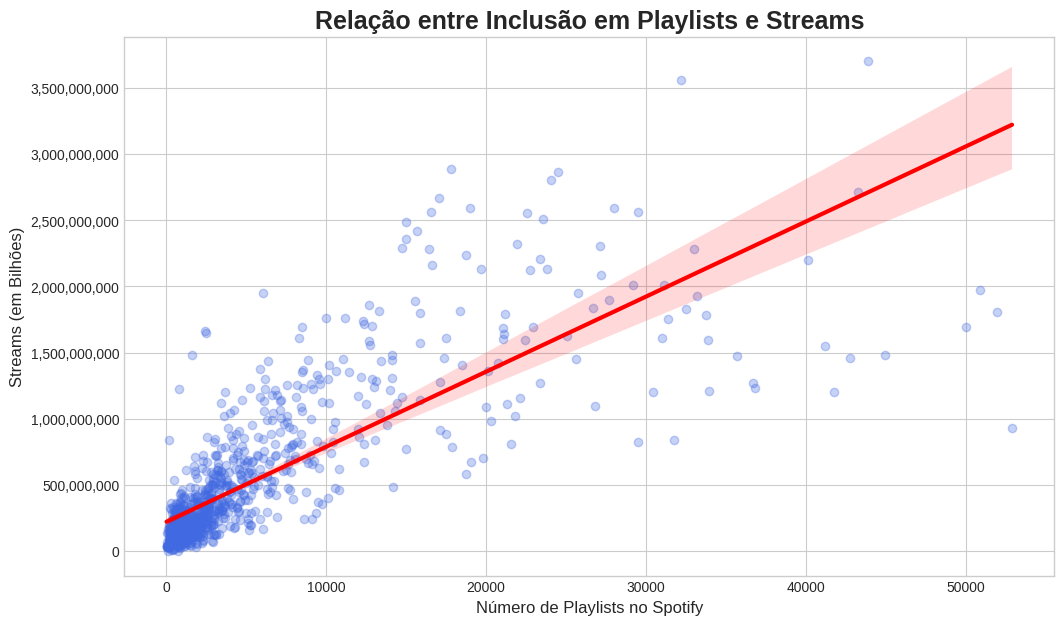

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from google.colab import files

print("Por favor, faça o upload do seu arquivo 'spotify_cleaned_final.csv'")
uploaded = files.upload()

file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)

print("\nDados carregados com sucesso! Primeiras 5 linhas:")
print(df.head())

print("\nInformações sobre o DataFrame:")
df.info()

df.dropna(subset=['in_spotify_playlists', 'streams'], inplace=True)

X = df[['in_spotify_playlists']]
y = df['streams']

model = LinearRegression()

model.fit(X, y)

coeficiente = model.coef_[0]
intercepto = model.intercept_

print(f"Resultados do Modelo de Regressão Linear:")
print(f"-------------------------------------------")
print(f"Coeficiente (Inclinação): {coeficiente:.2f}")
print(f"Intercepto: {intercepto:.2f}")

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))

sns.regplot(
    x='in_spotify_playlists',
    y='streams',
    data=df,
    scatter_kws={'alpha': 0.3, 'color': 'royalblue'},
    line_kws={'color': 'red', 'linewidth': 3}
)

plt.title('Relação entre Inclusão em Playlists e Streams', fontsize=18, fontweight='bold')
plt.xlabel('Número de Playlists no Spotify', fontsize=12)
plt.ylabel('Streams (em Bilhões)', fontsize=12)

plt.ticklabel_format(style='plain', axis='y')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()